In [1]:
import pandas as pd

# Load the data

In [2]:
dataframe=pd.read_csv('D:/downloads/updated_collegePlace.csv')

In [3]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8.0,1,1,1
1,21,Female,Computer Science,0,7.0,1,1,1
2,22,Female,Information Technology,1,6.0,0,0,1
3,21,Male,Information Technology,0,8.0,0,1,1
4,22,Male,Mechanical,0,8.0,1,0,1


In [4]:
dataframe.shape

(2976, 8)

In [5]:
dataframe['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

In [6]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8.0,1,1,1
1,21,0,Computer Science,0,7.0,1,1,1
2,22,0,Information Technology,1,6.0,0,0,1
3,21,1,Information Technology,0,8.0,0,1,1
4,22,1,Mechanical,0,8.0,1,0,1


In [7]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil',
       'Artificial Intelligence and Data Science'], dtype=object)

In [8]:
dataframe['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [9]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8.0,1,1,1
1,21,0,1,0,7.0,1,1,1
2,22,0,2,1,6.0,0,0,1
3,21,1,2,0,8.0,0,1,1
4,22,1,3,0,8.0,1,0,1


In [10]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [12]:
age=dataframe['Age']
stream=dataframe['Stream']
internship=dataframe['Internships']
cgpa=dataframe['CGPA']
hostel=dataframe['Hostel']
backlog=dataframe['HistoryOfBacklogs']
Y=dataframe['PlacedOrNot']

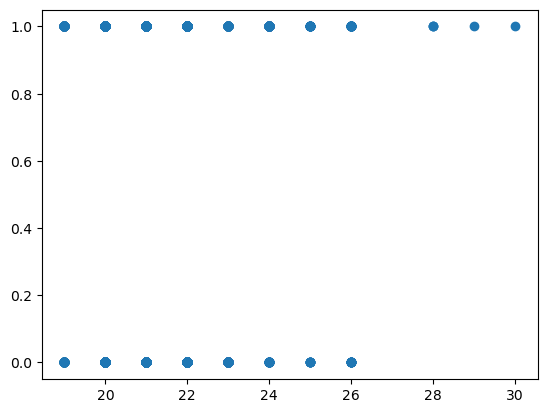

In [13]:
plt.scatter(age,Y)

In [14]:
X=dataframe.drop(['PlacedOrNot'],axis=1)
y=dataframe["PlacedOrNot"]

In [15]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,0,1,8.00,1,1
1,21,0,1,0,7.00,1,1
2,22,0,2,1,6.00,0,0
3,21,1,2,0,8.00,0,1
4,22,1,3,0,8.00,1,0
...,...,...,...,...,...,...,...
2971,20,1,Artificial Intelligence and Data Science,1,7.69,0,0
2972,22,1,Artificial Intelligence and Data Science,0,7.07,0,0
2973,23,0,Artificial Intelligence and Data Science,1,7.16,0,1
2974,20,0,Artificial Intelligence and Data Science,2,7.09,1,0


In [16]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
!pip install xgboost


In [18]:
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.09,n_estimators=150)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataframe['Gender'] = label_encoder.fit_transform(dataframe['Gender'])
dataframe['Stream'] = label_encoder.fit_transform(dataframe['Stream'])

In [34]:
X = dataframe.drop('PlacedOrNot', axis=1)
y = dataframe['PlacedOrNot']


# Split the data into training and testing sets

# Create and train the XGBoost classifier with optimized parameters


In [39]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=20, max_depth=2)
xgb_classifier.fit(X_train, y_train)

C:\Users\coold\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:36:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Make predictions



In [40]:
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model

In [41]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results


In [42]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[246  17]
 [ 63 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       263
           1       0.94      0.81      0.87       333

    accuracy                           0.87       596
   macro avg       0.87      0.87      0.87       596
weighted avg       0.88      0.87      0.87       596



# Other Classifiers with varying accuracy

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score





# List of classifiers to compare


In [37]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=20, max_depth=2)
}



# Compare models


In [38]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.88
Logistic Regression Accuracy: 0.75
Support Vector Machine Accuracy: 0.76
K-Nearest Neighbors Accuracy: 0.88
XGBoost Accuracy: 0.87


C:\Users\coold\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:35:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
